# Partial Domination on Trees

In [1]:
# imports

from sage.graphs.graph import Graph # display graphs

from itertools import permutations # get permutations
from itertools import combinations # get power set

from sage.graphs.trees import TreeIterator # create trees iteratively

import math # for factorial function

import pandas as pd # data analysis

import os # for files / operating system stuff

import ast # for funky data type issues with SageMath

In [2]:
# fraction of graph we expect to dominate

partial_domination_fraction = 1/3
partial_domination_fraction2 = 2/3

## Helper Functions

In [3]:
def calculate_dominated_vertices(tree, S):
    '''
    helper function to calculate the set of dominated vertices for a tree 
     -> minimize repeated logic in other functions
    INPUTS: Sage tree (Graph) and set of vertices being checked (list)
    RETURNS: set of dominated vertices
    '''

    dominated = set() # empty set to track dominated vertices
    
    for v in S: # for a vertex in the set S
        dominated.update(tree.neighbors(v))  # add neighbors of v
        dominated.add(v)  # add the vertex itself
    
    return dominated # return the set of dominated vertices

In [4]:
def visualize_partial_domination(tree, S, save_path=None):
    '''
    function to visualize tree with highlighted vertices accoridng to domination 
     -> green for dominated, red for undominated
    INPUTS: Sage tree (Graph) and set of vertices in dominating set (found through check_partial_domination)
    '''
    dominated = calculate_dominated_vertices(tree, S)

    # group vertices by color
    green_vertices = list(dominated)
    red_vertices = [v for v in tree.vertices() if v not in dominated]
    vertex_colors = {'green': green_vertices, 'red': red_vertices}

    # visualiz graph
    p = tree.plot(vertex_colors=vertex_colors)

    # save path or show
    if save_path:
        p.save(save_path)
        print(f"Graph saved to {save_path}")
    else:
        p.show()


In [5]:
def is_minimal(tree, subset, required_dominated):
    """
    check if subset is a minimal p-dominating set.
    -> removing any vertex causes it to no longer dominate enough
    """
    for i in range(len(subset)):
        test_set = subset[:i] + subset[i+1:]  # remove one element
        dominated = calculate_dominated_vertices(tree, test_set)  # call helper
        if len(dominated) >= required_dominated:  # more than 1/3rd dominated
            return False  # it's not minimal
    return True # exactly 1/3rd dominated

In [6]:
def calculate_tree_features(tree):
    '''
    get various features from a given tree to store in the excel
    '''
    degrees = tree.degree()
    max_degree = max(degrees)
    num_leaves = sum(1 for d in degrees if d == 1)
    return max_degree, num_leaves

## Subset Partial Domination

Check for the smallest size set of partial domination by checking 1, 2, ... n size sets for partial domination. Return when 1/3 dominaton is reached for each set.

This should be computationally more efficient than checking permutations. Thus, we check a worst case size 2^n. 

In [7]:
def subset_partial_domination(tree, fraction=partial_domination_fraction):
    """
    function to test vertex sets of various sizes to find fraction dominated set 
     -> we are using 1/3 as decleared above
     -> we incrementally increase the subset size
    INPUTS: Sage tree (Graph) and fraction of graph to be dominated (float)
    RETURNS: list of smallest valid 1/3 dominating set 
    """
    vertices = tree.vertices()
    required_dominated = float(fraction * len(vertices))  # minimum number of vertices to dominate

    size_counts = {}  # dictionary to track set sizes
    smallest_set = None  # track the smallest valid set
    min_size = float('inf')  # start with an infinitely large size
    max_minimal_size = -1 # start with biggest being -1
    valid_sets = []  # track valid sets of the smallest size


    total_subsets = sum(math.comb(len(vertices), i) for i in range(1, len(vertices) + 1))
    # print("Total subsets: ", total_subsets) # UNCOMMENT to print

    # iterate over subsets starting from size 1 up to vertex length
    for i in range(1, len(vertices) + 1):
        for subset in combinations(vertices, i): # using combinations from itertools
            dominated = calculate_dominated_vertices(tree, subset)  # use helper function
            
            # if this subset dominates at least 1/3 of the vertices, track it
            if len(dominated) >= required_dominated:
                set_size = len(subset) # get dominating set size
                subset_list = list(subset)

                ''' UNCOMENT TO TRACK ALL SUBSET SIZES:
                # update size count
                if set_size in size_counts: # if size exists already, add 1
                    size_counts[set_size]+= 1
                else:
                    size_counts[set_size]=1
                

                # update smallest set tracker if this one is smaller
                if set_size < min_size:
                    min_size = set_size
                    smallest_set = list(subset) # store smallest set found
                '''

                # find the total number of smallest sets
                if set_size < min_size:
                    min_size = set_size
                    valid_sets = [subset] # start again if a smaller set is found
                elif set_size == min_size:
                    valid_sets.append(subset) # add more of same size

                # find the largest minimal valid set
                if is_minimal(tree, subset_list, required_dominated):
                    if len(subset) > max_minimal_size:
                        max_minimal_size = len(subset)
    '''                
    UNCOMENT TO TRACK ALL SUBSET SIZES:
    # print set size distribution
    print("\nSet Size Distribution of Valid Partial Domination Sets:")
    for size in sorted(size_counts.keys()):
        print(f"Size {size}: {size_counts[size]} occurrences") 
    '''

    ''' UNCOMMENT TO PRINT: 
    print(f"Smallest set size: {min_size}")
    print(f"Occurances: {len(valid_sets)}")
    print(f"\nExample set: {valid_sets[0] if valid_sets else None} \n")
    '''
            
    # return valid_sets[0] if valid_sets else None # return example of smallest set
    return (valid_sets[0], len(valid_sets), max_minimal_size) if valid_sets else (None, 0, None) # return udates to also show # occurances

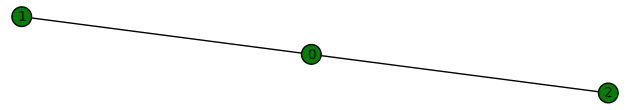

In [8]:
# TEST 1 - check functions to find a 1/3-dominating set using permutations
tree = next(TreeIterator(3))

dominating_set, _, _ = subset_partial_domination(tree)

# visualize tree 
visualize_partial_domination(tree, dominating_set)


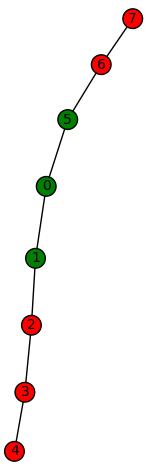

In [9]:
# TEST 2

# generate a tree with 5 vertices
tree = next(TreeIterator(8))

# find a 1/3-dominating set
dominating_set, _, _ = subset_partial_domination(tree, fraction=1/3)

# visualize tree
visualize_partial_domination(tree, dominating_set)

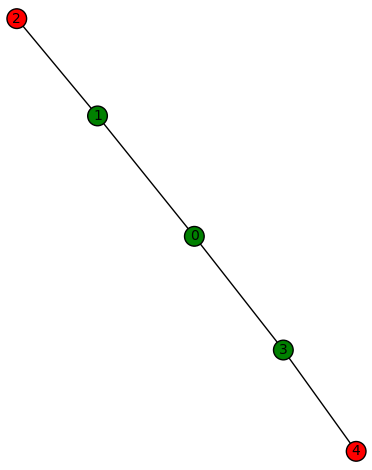

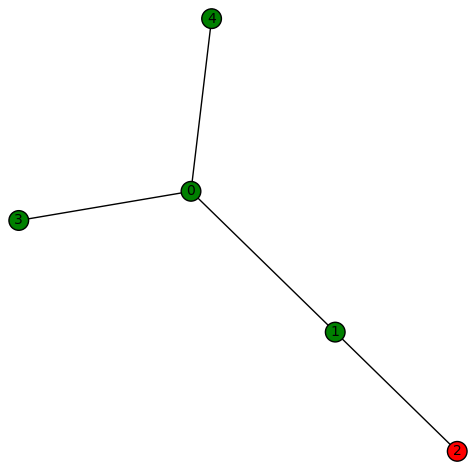

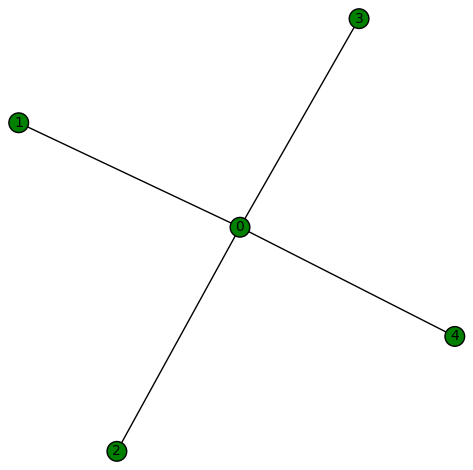

In [10]:
for i, T in enumerate(TreeIterator(5)):
    # print(f"TREE {i + 1}")
    #T.show() # uncomment to see orginal tree
    
    # find the 1/3-dominating set
    dominating_set, _, _ = subset_partial_domination(T)

    visualize_partial_domination(T, dominating_set)

In [11]:
for i, T in enumerate(TreeIterator(10)):
    # print(f"TREE {i + 1}")
    #T.show() # uncomment to see orginal tree
    
    # find the 1/3-dominating set
    dominating_set = subset_partial_domination(T)
    
    #visualize_partial_domination(T, dominating_set)

## DataFrame
Consider using SQLite instead of Excel for data storage?

In [14]:
def excel_saved__partial_domination(max_vertices, fraction1=partial_domination_fraction, fraction2=partial_domination_fraction2, save_to_excel=True):
    """
    function to test the partial domination function over different size trees and save to an Excel file 
    INPUTS: max_vertices # trees vertices to collect data (1 to max), partial domination fraction (1/3), and boolean save_to_excel
    RETURNS: list of smallest valid 1/3 dominating set
    
    """
    data = []  # store results here
    trees_list = []  # store list of trees for visualizing
    index = 0  # running index for data reference
    
    for n in range(1, max_vertices + 1):  # starting from 1 vertex
        
        for tree in TreeIterator(n):
            # append tree twice (because we have both 1/3 and 2/3 tracking, so it keeps data consistency
            trees_list.append(tree)
            trees_list.append(tree)

            max_deg, num_leaves = calculate_tree_features(tree)

            # collect data for fractions 1/3 and 2/3
            for fraction in [fraction1, fraction2]:
                result, occurrences, max_size = subset_partial_domination(tree, fraction)
                min_size = len(result) if result else None

                gamma_diff = max_size - min_size if (min_size is not None and max_size is not None) else None
                is_unique = occurrences == 1

                data.append({
                    "Index": index,
                    "Vertices": n,
                    "Partial Domination Fraction": fraction,
                    "Smallest Set Size": min_size,
                    "Occurrences": occurrences,
                    "Example Set": result,
                    "Max Minimal Set Size": max_size,
                    "Gamma - Gamma": gamma_diff,
                    "Edges": list(tree.edges(labels=False)),
                    "Max Degree": max_deg,
                    "Number of Leaves": num_leaves,
                    "Is Unique": is_unique,
                    "Excel Row": index + 2,  # +2 to account for header and 0-indexing
                })

                index += 1
            
    
    # make a Pandas df
    df = pd.DataFrame(data)
    
    # export to Excel
    if save_to_excel:
        filename = f"partial_domination_results_{max_vertices}_vertices.xlsx"
        df.to_excel(filename, index=False)
        print(f"\nData saved to {filename}")

    return df, trees_list # return df to return the dataframe

In [15]:
# analyze trees up to 14 vertices
df, trees_list = excel_saved__partial_domination(max_vertices=14)


Data saved to partial_domination_results_14_vertices.xlsx


In [16]:
df

,Index,Vertices,Partial Domination Fraction,Smallest Set Size,Occurrences,Example Set,Max Minimal Set Size,Gamma - Gamma,Edges,Max Degree,Number of Leaves,Is Unique,Excel Row
0,0,1,1/3,1,1,"(0,)",1,0,[],0,0,True,2
1,1,1,2/3,1,1,"(0,)",1,0,[],0,0,True,3
2,2,2,1/3,1,2,"(0,)",1,0,"[(0, 1)]",1,2,False,4
3,3,2,2/3,1,2,"(0,)",1,0,"[(0, 1)]",1,2,False,5
4,4,3,1/3,1,3,"(0,)",1,0,"[(0, 1), (0, 2)]",2,2,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10889,10889,14,2/3,1,1,"(0,)",9,8,"[(0, 1), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8...",11,11,True,10891
10890,10890,14,1/3,1,1,"(0,)",4,3,"[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7...",12,12,True,10892
10891,10891,14,2/3,1,1,"(0,)",9,8,"[(0, 1), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7...",12,12,True,10893
10892,10892,14,1/3,1,1,"(0,)",4,3,"[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...",13,13,True,10894


In [17]:
def visualize_tree_from_excel(df, trees_list, row_index):
    '''
    function to visualize a specific tree with highlighted vertices accoridng to domination  from the Excel-stored DataFrame
     -> green for dominated, red for undominated
    INPUTS: df (created from excel), trees list created in excel function, row index from corresonding Excel row
    -> note that DF and lists are 0-indexed, so if we are looking for an Excel row, make sure that you subtract 1 from the row for row_index
    '''
    # convert to int (avodi an error)
    row_index = int(row_index)
    
    # retrieve tree object from the list using the row index
    tree = trees_list[row_index]
    
    # retrieve example dominating set from the DF
    S = df.iloc[row_index]["Example Set"]
    
    # ensure set is properly formatted
    if pd.isna(S) or S is None:
        print("No dominating set found for this tree.")
        return

    # convert from DF stored format (list-like) to actual SageMath set
    S = set(S) if isinstance(S, (list, tuple)) else {S}
    
    print(f"Visualizing tree at index {row_index} with dominating set: {S}")
    
    # call SageMath visualization function (defined above)
    visualize_partial_domination(tree, S)

Visualizing tree at index 5 with dominating set: {0}


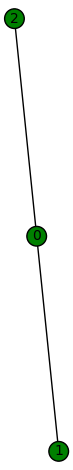

In [18]:
# Visualize from Excel test

visualize_tree_from_excel(df, trees_list, row_index=5)  # row index is 5, so this is row 6 of Excel

## Store the variables

In [19]:
# store dataframe as a csv file
df.to_csv("df.csv", index=False)

# pd.read_csv("df.csv")

In [20]:
# store the trees list
%store trees_list
# %store -r trees_list

Stored 'trees_list' (list)


In [21]:
import pickle

# save trees_list as a pickle file
with open("trees_list.pkl", "wb") as f:
    pickle.dump(trees_list, f)

print("trees_list saved as trees_list.pkl")

trees_list saved as trees_list.pkl


In [22]:
# RESAVE but using the edges of the tree

# convert trees into lists of edges
trees_edges_list = [list(tree.edges()) for tree in trees_list]  # if needed: remove weights w edges(labels=False)

# save the edge lists
with open("trees_edges_list.pkl", "wb") as f:
    pickle.dump(trees_edges_list, f)

print("saved as trees_edges_list.pkl")

saved as trees_edges_list.pkl


## Save Visualizations for Later for First 14 Vertices

In [23]:
# folder names for domination fractions in a hashmap
fraction_map = {
    "1/3": "pOneThird_14",
    "2/3": "pTwoThird_14"
}

In [24]:
# loop through DataFrame
for idx, row in df.iterrows():
    try:
        # get values
        fraction = row["Partial Domination Fraction"]
        set_size = row["Smallest Set Size"]
        edges = row["Edges"]
        example_set = row["Example Set"]
        
        # build folder path
        top_folder = fraction_map[str(fraction)]  # outer folder -> which fraction it belongs to
        sub_folder = f"{top_folder}/Size{set_size}"  # inner folder -> smallest set size
        os.makedirs(sub_folder, exist_ok=True)
        
        # create filename using excel row number (1-indexed) -> allows us to find the graph's info in excel
        file_path = os.path.join(sub_folder, f"row{idx+1}.pdf")
        
        # build graph
        tree = Graph(edges)
        
        # visualize and save to new filepath
        visualize_partial_domination(tree, example_set, save_path=file_path)
    
    except Exception as e:
        print(f"Error on row {idx}: {e}")


Error on row 0: vertex (0) is not a vertex of the graph
Error on row 1: vertex (0) is not a vertex of the graph
Graph saved to pOneThird_14/Size1/row3.pdf
Graph saved to pTwoThird_14/Size1/row4.pdf
Graph saved to pOneThird_14/Size1/row5.pdf
Graph saved to pTwoThird_14/Size1/row6.pdf
Graph saved to pOneThird_14/Size1/row7.pdf
Graph saved to pTwoThird_14/Size1/row8.pdf
Graph saved to pOneThird_14/Size1/row9.pdf
Graph saved to pTwoThird_14/Size1/row10.pdf
Graph saved to pOneThird_14/Size1/row11.pdf
Graph saved to pTwoThird_14/Size2/row12.pdf
Graph saved to pOneThird_14/Size1/row13.pdf
Graph saved to pTwoThird_14/Size1/row14.pdf
Graph saved to pOneThird_14/Size1/row15.pdf
Graph saved to pTwoThird_14/Size1/row16.pdf
Graph saved to pOneThird_14/Size1/row17.pdf
Graph saved to pTwoThird_14/Size2/row18.pdf
Graph saved to pOneThird_14/Size1/row19.pdf
Graph saved to pTwoThird_14/Size1/row20.pdf
Graph saved to pOneThird_14/Size1/row21.pdf
Graph saved to pTwoThird_14/Size1/row22.pdf
Graph saved to 

## Summary By n

We can find the minimum, maximum, and average smallest set size for each set of n-vertice graphs and segment it by partial domination fraction. 

In [25]:
# group by vertices and fraction
summary_df = (
    df.groupby(["Vertices", "Partial Domination Fraction"])["Max Minimal Set Size"]
    .agg(["min", "max", "mean"])
    .reset_index()
)

# rename columns for clarity
summary_df.columns = ["Vertices", "Fraction", "Min Size", "Max Size", "Avg Size"]

# round average
summary_df["Avg Size"] = summary_df["Avg Size"].round(2)

# show result
summary_df

,Vertices,Fraction,Min Size,Max Size,Avg Size
0,1,1/3,1,1,1.00
1,1,2/3,1,1,1.00
2,2,1/3,1,1,1.00
3,2,2/3,1,1,1.00
4,3,1/3,1,1,1.00
5,3,2/3,1,1,1.00
6,4,1/3,1,1,1.00
7,4,2/3,2,2,2.00
8,5,1/3,1,1,1.00
9,5,2/3,2,3,2.33


This does the same grouping but on the maximum minimal p-dominating sets.

In [26]:
# group by vertices and fraction
summary_df_max = (
    df.groupby(["Vertices", "Partial Domination Fraction"])["Max Minimal Set Size"]
    .agg(["min", "max", "mean"])
    .reset_index()
)

# rename columns for clarity
summary_df_max.columns = ["Vertices", "Fraction", "Min Size", "Max Size", "Avg Size"]

# round average
summary_df_max["Avg Size"] = summary_df_max["Avg Size"].round(2)

# show result
summary_df_max

,Vertices,Fraction,Min Size,Max Size,Avg Size
0,1,1/3,1,1,1.00
1,1,2/3,1,1,1.00
2,2,1/3,1,1,1.00
3,2,2/3,1,1,1.00
4,3,1/3,1,1,1.00
5,3,2/3,1,1,1.00
6,4,1/3,1,1,1.00
7,4,2/3,2,2,2.00
8,5,1/3,1,1,1.00
9,5,2/3,2,3,2.33


### 1/3rd
Notice that the max size is 1 for everything but n=10. The fraction 1/3rd is low enough that for lower vertex graphs, only 1 vertex is needed to partially dominate.

In [27]:
# summary for one third fraction
onethird_summary_df = summary_df[summary_df['Fraction'] == 1/3]
onethird_summary_df

,Vertices,Fraction,Min Size,Max Size,Avg Size
0,1,1/3,1,1,1.00
2,2,1/3,1,1,1.00
4,3,1/3,1,1,1.00
6,4,1/3,1,1,1.00
8,5,1/3,1,1,1.00
10,6,1/3,1,1,1.00
12,7,1/3,2,2,2.00
14,8,1/3,2,2,2.00
16,9,1/3,2,2,2.00
18,10,1/3,2,3,2.42


In [28]:
# summary for one third fraction with the maxmimum minimal p-dominating set
onethird_summary_df_max = summary_df_max[summary_df_max['Fraction'] == 1/3]
onethird_summary_df_max

,Vertices,Fraction,Min Size,Max Size,Avg Size
0,1,1/3,1,1,1.00
2,2,1/3,1,1,1.00
4,3,1/3,1,1,1.00
6,4,1/3,1,1,1.00
8,5,1/3,1,1,1.00
10,6,1/3,1,1,1.00
12,7,1/3,2,2,2.00
14,8,1/3,2,2,2.00
16,9,1/3,2,2,2.00
18,10,1/3,2,3,2.42


### 2/3rd
Here, we see more dispersion. Specifcally, n=1 to n=4 again shows no variation in the min/max size, but starting at n=5, the max size becomes two. The generak trend is the average size increasing with the size of vertices, but it is interesting in the case of n=5 that the averageis higehr than n=6. This is the same for n=8 and n=9, although this difference is much smaller.

In [29]:
# summary for two thirds fraction
twothird_summary_df = summary_df[summary_df['Fraction'] == 2/3]
twothird_summary_df

,Vertices,Fraction,Min Size,Max Size,Avg Size
1,1,2/3,1,1,1.00
3,2,2/3,1,1,1.00
5,3,2/3,1,1,1.00
7,4,2/3,2,2,2.00
9,5,2/3,2,3,2.33
11,6,2/3,2,3,2.33
13,7,2/3,2,4,3.09
15,8,2/3,3,5,3.70
17,9,2/3,3,5,3.66
19,10,2/3,3,6,4.34


In [30]:
# summary for two thirds fraction with the maxmimum minimal p-dominating set
twothird_summary_df_max = summary_df_max[summary_df_max['Fraction'] == 2/3]
twothird_summary_df_max

,Vertices,Fraction,Min Size,Max Size,Avg Size
1,1,2/3,1,1,1.00
3,2,2/3,1,1,1.00
5,3,2/3,1,1,1.00
7,4,2/3,2,2,2.00
9,5,2/3,2,3,2.33
11,6,2/3,2,3,2.33
13,7,2/3,2,4,3.09
15,8,2/3,3,5,3.70
17,9,2/3,3,5,3.66
19,10,2/3,3,6,4.34
